In [1]:
!pip install emoji

In [2]:
import numpy as np
import pandas as pd

In [3]:
train= pd.read_csv("train_emoji.csv", header=None)
train.drop(labels=[2, 3], axis=1, inplace=True)
test= pd.read_csv("test_emoji.csv", header= None)
train.head()

,0,1
0,never talk to me again,3
1,I am proud of your achievements,2
2,It is the worst day in my life,3
3,Miss you so much,0
4,food is life,4


In [4]:
test.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [5]:
import emoji as emoji

In [6]:
emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:"
                   }

In [7]:
emoji.emojize(":automobile:")

'🚗'

In [8]:
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

❤️
⚾
😁
😓
🍴


In [9]:
data = train.values
for i in range(50):
    print(data[i][0],emoji.emojize(emoji_dictionary[str(data[i][1])]))

never talk to me again 😓
I am proud of your achievements 😁
It is the worst day in my life 😓
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😓
congratulations on your acceptance 😁
The assignment is too long  😓
I want to go play ⚾
she did not answer my text  😓
Your stupidity has no limit 😓
how many points did he score ⚾
my algorithm performs poorly 😓
I got approved 😁
Stop shouting at me 😓
Sounds like a fun plan ha ha 😁
no one likes him 😓
the game just finished ⚾
I will celebrate soon 😁
So sad you are not coming 😓
She is my dearest love ❤️
Good job 😁
It was funny lol 😁
candy is life  😁
The chicago cubs won again ⚾
I am hungry 🍴
I am so excited to see you after so long 😁
you did well on you exam 😁
lets brunch some day 🍴
he is so cute ❤️
How dare you ask that 😓
do you want to join me for dinner  🍴
I said yes 😁
she is attractive ❤️
you suck 😓
she smiles a lot 😁
he is laughing 😁
she takes forever to get ready  😓
French macaroon is so tasty 🍴
we made it 😁
I am excited

In [12]:
from keras.utils import to_categorical

In [13]:
X_train = train[0]
X_test = test[0]

Y_train = to_categorical(train[1])
Y_test = to_categorical(test[1])


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(132,)
(56,)
(132, 5)
(56, 5)


In [14]:
embeddings = {}
with open(r'glove.6B.50d.txt',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:],dtype='float32')
        
        #print(word)
        #print(coeffs)
        embeddings[word] = coeffs

In [15]:
def getOutputEmbeddings(X):
    
    embedding_matrix_output = np.zeros((X.shape[0],10,50))
    for ix in range(X.shape[0]):
        X[ix] = X[ix].split()
        for jx in range(len(X[ix])):
            embedding_matrix_output[ix][jx] = embeddings[X[ix][jx].lower()]
            
    return embedding_matrix_output

In [16]:
X_train[1]

'I am proud of your achievements'

In [17]:
emb_Xtrain= getOutputEmbeddings(X_train)
emb_Xtest= getOutputEmbeddings(X_test)

C:\Users\Apoorva Priya\AppData\Local\Temp/ipykernel_18348/2176504226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ix] = X[ix].split()


In [18]:
print(emb_Xtrain.shape)
print(emb_Xtest.shape)

(132, 10, 50)
(56, 10, 50)


In [19]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 64)            29440     
                                                                 
 dropout_2 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
Total params: 62,789
Trainable params: 62,789
Non-trai

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history= model.fit(emb_Xtrain,Y_train,batch_size=32,epochs=100,shuffle=True,validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 11s 733ms/step - loss: 1.5909 - acc: 0.2881 - val_loss: 1.6148 - val_acc: 0.2857
Epoch 2/100
4/4 [==============================] - 0s 41ms/step - loss: 1.5227 - acc: 0.3136 - val_loss: 1.6249 - val_acc: 0.2857
Epoch 3/100
4/4 [==============================] - 0s 46ms/step - loss: 1.4830 - acc: 0.3390 - val_loss: 1.6501 - val_acc: 0.3571
Epoch 4/100
4/4 [==============================] - 0s 40ms/step - loss: 1.4289 - acc: 0.4576 - val_loss: 1.6194 - val_acc: 0.3571
Epoch 5/100
4/4 [==============================] - 0s 48ms/step - loss: 1.3986 - acc: 0.4068 - val_loss: 1.5424 - val_acc: 0.4286
Epoch 6/100
4/4 [==============================] - 0s 57ms/step - loss: 1.3361 - acc: 0.4576 - val_loss: 1.4752 - val_acc: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 64ms/step - loss: 1.2426 - acc: 0.5424 - val_loss: 1.4451 - val_acc: 0.6429
Epoch 8/100
4/4 [==============================] - 0s 44ms/step - loss: 1.1511 - acc: 0.

4/4 [==============================] - 0s 37ms/step - loss: 0.0126 - acc: 1.0000 - val_loss: 1.4925 - val_acc: 0.6429
Epoch 64/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0129 - acc: 1.0000 - val_loss: 1.5793 - val_acc: 0.5714
Epoch 65/100
4/4 [==============================] - 0s 56ms/step - loss: 0.0210 - acc: 0.9915 - val_loss: 1.3901 - val_acc: 0.5714
Epoch 66/100
4/4 [==============================] - 0s 52ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 1.0956 - val_acc: 0.7143
Epoch 67/100
4/4 [==============================] - 0s 43ms/step - loss: 0.0119 - acc: 1.0000 - val_loss: 1.0886 - val_acc: 0.7143
Epoch 68/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.2271 - val_acc: 0.5714
Epoch 69/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0071 - acc: 1.0000 - val_loss: 1.3881 - val_acc: 0.5714
Epoch 70/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0062 - acc: 1.0000 - 

In [25]:
import matplotlib.pyplot as plt

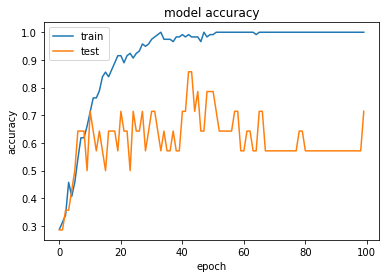

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

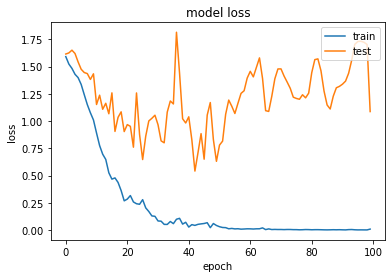

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [28]:
model.evaluate(emb_Xtest,Y_test)

2/2 [==============================] - 0s 10ms/step - loss: 2.1498 - acc: 0.5893


[2.1498239040374756, 0.5892857313156128]

In [29]:
pred = np.argmax(model.predict(emb_Xtest),axis=1)

2/2 [==============================] - 2s 20ms/step


In [30]:
for i in range(30):
    print(' '.join(X_test[i]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(Y_test[i]))]))
    print(emoji.emojize(emoji_dictionary[str(pred[i])]))

I want to eat
🍴
🍴
he did not answer
😓
😓
he got a raise
😁
😓
she got me a present
❤️
😁
ha ha ha it was so funny
😁
😁
he is a good friend
❤️
😁
I am upset
❤️
⚾
We had such a lovely dinner tonight
❤️
😁
where is the food
🍴
🍴
Stop making this joke ha ha ha
😁
😁
where is the ball
⚾
⚾
work is hard
😓
😁
This girl is messing with me
😓
❤️
are you serious ha ha
😁
😓
Let us go play baseball
⚾
⚾
This stupid grader is not working
😓
😓
work is horrible
😓
😓
Congratulation for having a baby
😁
😁
stop messing around
😓
⚾
any suggestions for dinner
🍴
🍴
I love taking breaks
❤️
❤️
you brighten my day
😁
❤️
I boiled rice
🍴
🍴
she is a bully
😓
😓
Why are you feeling bad
😓
😓
I am upset
😓
⚾
I worked during my birthday
😓
😁
My grandmother is the love of my life
❤️
❤️
enjoy your break
😁
⚾
valentine day is near
❤️
😁


In [31]:
with open("model.json", "w") as file:
    file.write(model.to_json())
model.save_weights("model.h5")

In [32]:
from keras.models import model_from_json

In [33]:
with open("model.json", "r") as file:
    model = model_from_json(file.read())
model.load_weights("model.h5")

In [34]:
test_str = "its so painful"
X = pd.Series([test_str])
emb_X = getOutputEmbeddings(X)
p = np.argmax(model.predict(emb_X),axis=1)
print(' '.join(X[0]))
print(emoji.emojize(emoji_dictionary[str(p[0])]))

1/1 [==============================] - 2s 2s/step
its so painful
😓
